<a href="https://colab.research.google.com/github/SatyaRay003/Titanic-Survival-Prediction/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the repo

In [26]:
!git clone https://github.com/SatyaRay003/Titanic-Survival-Prediction.git

fatal: destination path 'Titanic-Survival-Prediction' already exists and is not an empty directory.


# Import all the necessary libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings

# Basic Data Exploration

In [185]:
train_df = pd.read_csv('/content/Titanic-Survival-Prediction/Data/train.csv')

In [186]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12


In [187]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [189]:
train_df.head(10).style.background_gradient(cmap='icefire')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


# Numerical Feature Analysis

In [190]:
numeric_features = train_df.select_dtypes(exclude=['object']).columns

In [191]:
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [192]:
numeric_df = train_df[numeric_features]

## Statistical Analysis

In [193]:
numeric_df.describe().T.style.background_gradient(cmap='Pastel2')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


### Heatmap

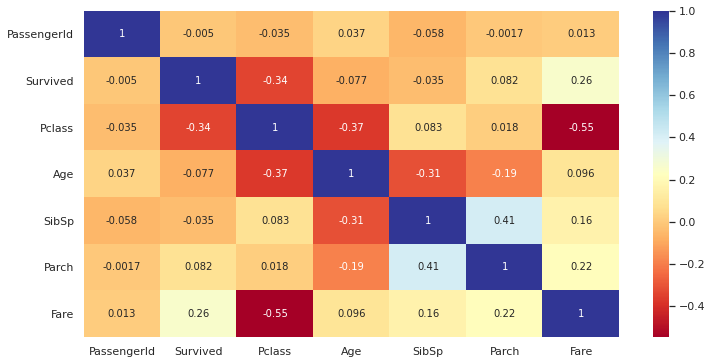

In [194]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlBu');

In [195]:
numeric_features_correlation_df = pd.DataFrame(numeric_df.corr().Survived)

In [196]:
abs(numeric_features_correlation_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


### Remarks

> From the above Heat map we can extract following insights

1. **Pclass or Passenger Class** is most correlated numeric feature with **Survived** compared with other numeric features.

2. **Pclass or Passenger Class** and **Fare** have significant negative correlation value (***0.55***) which is as our expectation.

3. **SibSp** and **Parch** have significant positive correlation value (***0.41***)

4. **PassengerId** feature has no reasonable correlation value with any other features.


## Multi-Variate Analysis

### Pairplot

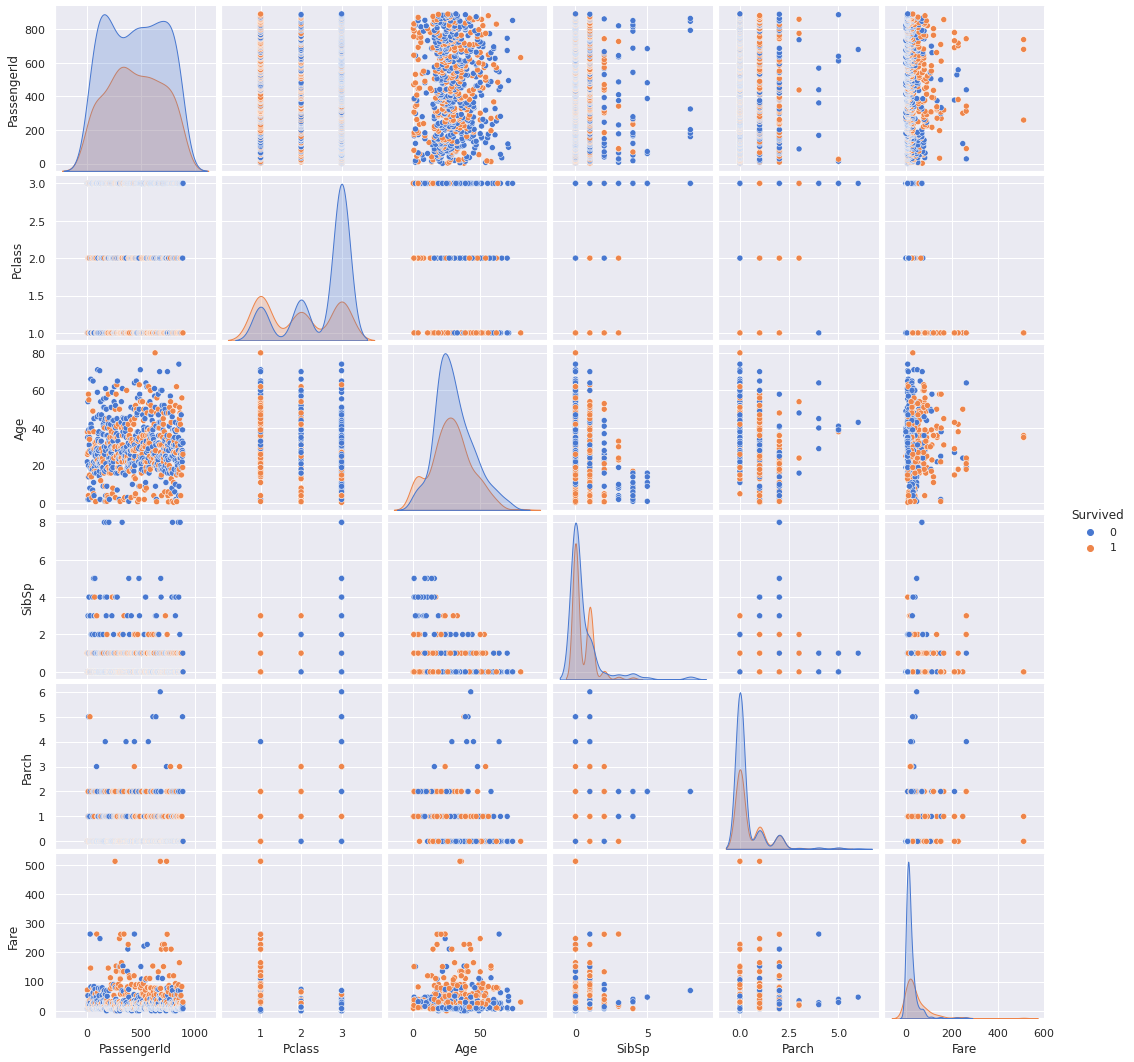

In [197]:
sns.pairplot(numeric_df, hue='Survived');

## Univariate Analysis

### Target Attribute - Survived

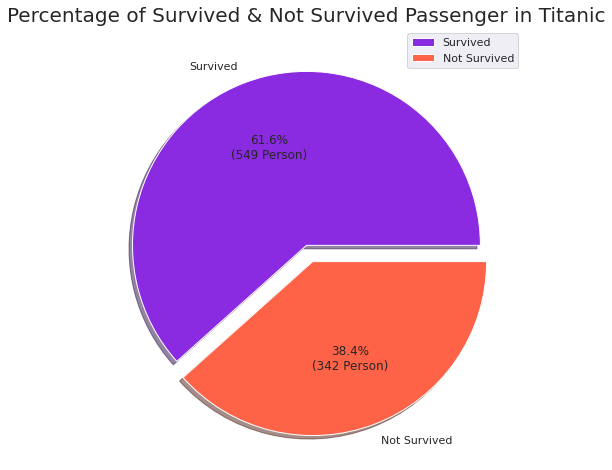

In [213]:
size = list(numeric_df['Survived'].value_counts())
labels = ['Survived', 'Not Survived']
colors = ['blueviolet', 'tomato']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Person)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passenger in Titanic', fontsize = 20)
plt.legend()
plt.show()

### Passesnger Class

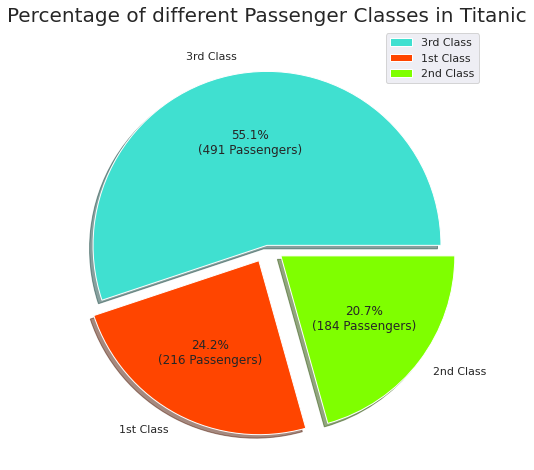

In [212]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of different Passenger Classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

In [200]:
def bar_plot(attribute, data, color, title, comparison = None):
    plt.figure(figsize=(10,5))
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

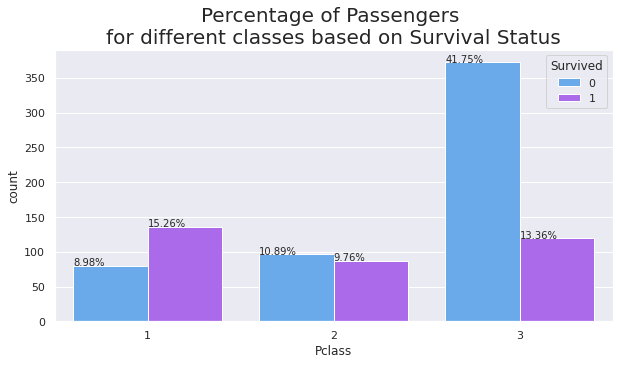

In [201]:
bar_plot('Pclass', numeric_df, 'cool', 
         "Percentage of Passengers \nfor different classes based on Survival Status", 'Survived')

### Fare

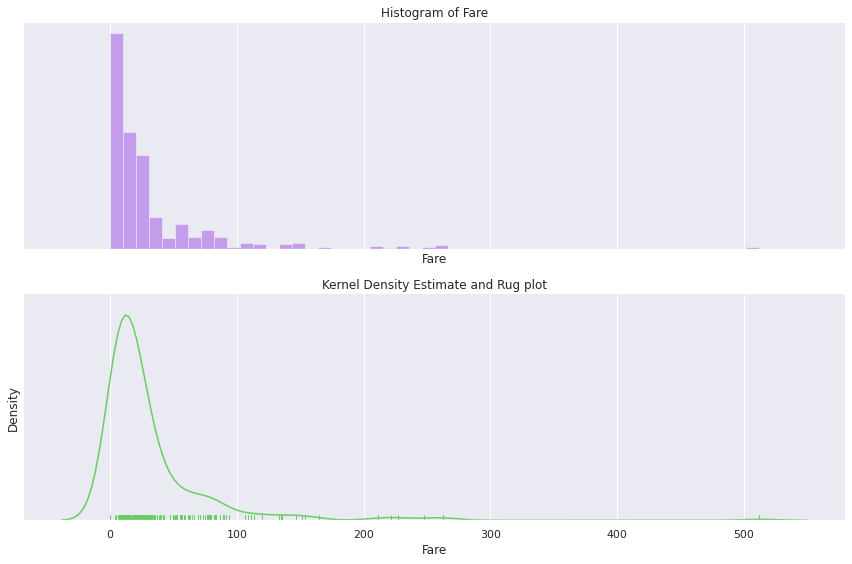

In [202]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a subplot
f, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(numeric_df.Fare, kde=False, color="blueviolet", ax=axes[0]).set_title('Histogram of Fare')

# Plot a kernel density estimate and rug plot
sns.distplot(numeric_df.Fare, hist=False, rug=True, color="g", ax=axes[1]).set_title('Kernel Density Estimate and Rug plot')

plt.setp(axes, yticks=[])
plt.tight_layout()

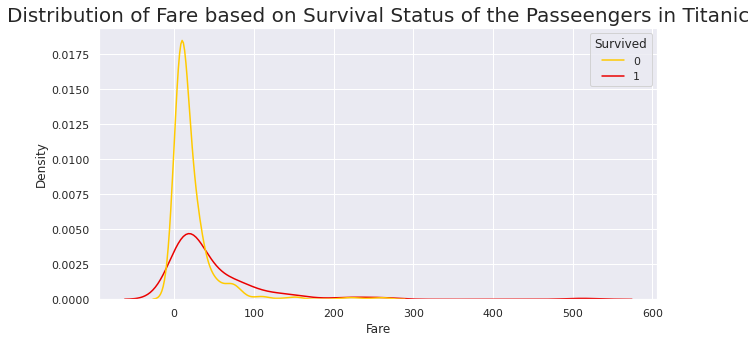

In [203]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on Survival Status of the Passeengers in Titanic", fontsize = 20);

### Parch

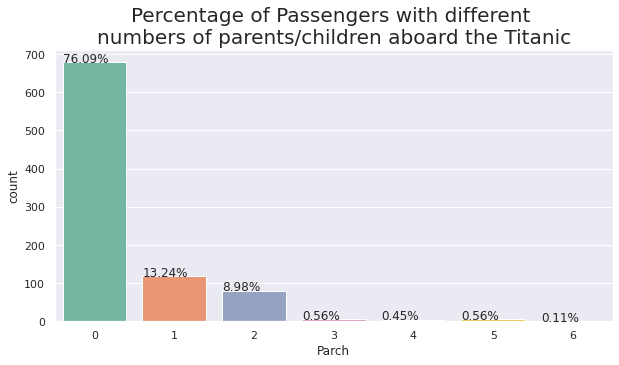

In [208]:
bar_plot('Parch', numeric_df, 'Set2', 
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic")

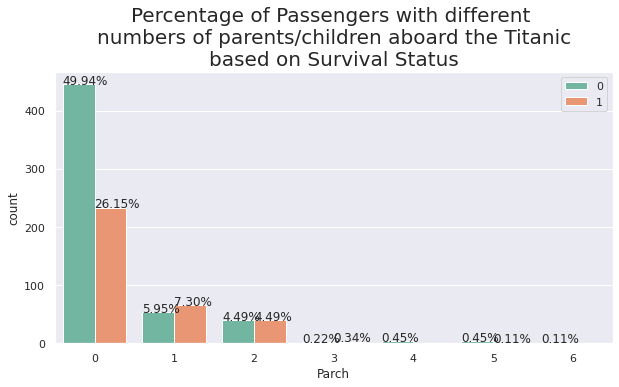

In [209]:
bar_plot('Parch', numeric_df, 'Set2', 
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on Survival Status",
         'Survived')

plt.legend(loc='upper right');

### Age

> Note:
  We've considered the following age groups

  0 - 2 ---> Infant 

  2 - 4 ---> Toddler 

  4 - 9 ---> Child 

  9 -15 ---> Teenager 

  15 - 21 ---> Adult 

  21 - 44 ---> Mid-Age 

  44 - 60 ---> Middle Senior 

  60 - 80 ---> Old-Age

In [272]:
def Feature_Bin(attribute, data, title, comparison = None):
    
    new_df = data.copy()
    
    intervals = [0, 2, 4, 9, 15, 21, 44, 60, 80]
    labels = ['Infant', 'Toddler', 'Child', 'Teenager', 'Adult', 'Mid-Age', 'Middle Senior', 'Old-Age']
    
    a = 'Different {} Grouped_Value'.format(attribute)
    new_df[a] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    
    plt.figure(figsize=(15,8))
    
    if comparison == None:
        ax = sns.countplot(x = a, data = new_df);
    else:
        ax = sns.countplot(x = a, data = new_df, hue = comparison);
        
    total = len(new_df[a])
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x=i.get_x()
        y=i.get_height()
        ax.annotate(percentage, (x,y))
        
    plt.title(title, size=20)

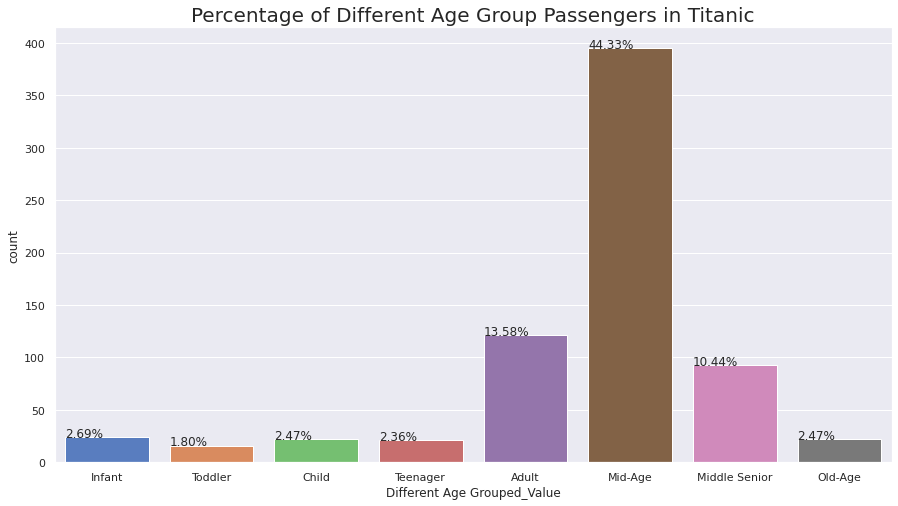

In [273]:
Feature_Bin('Age', numeric_df, 'Percentage of Different Age Group Passengers in Titanic')

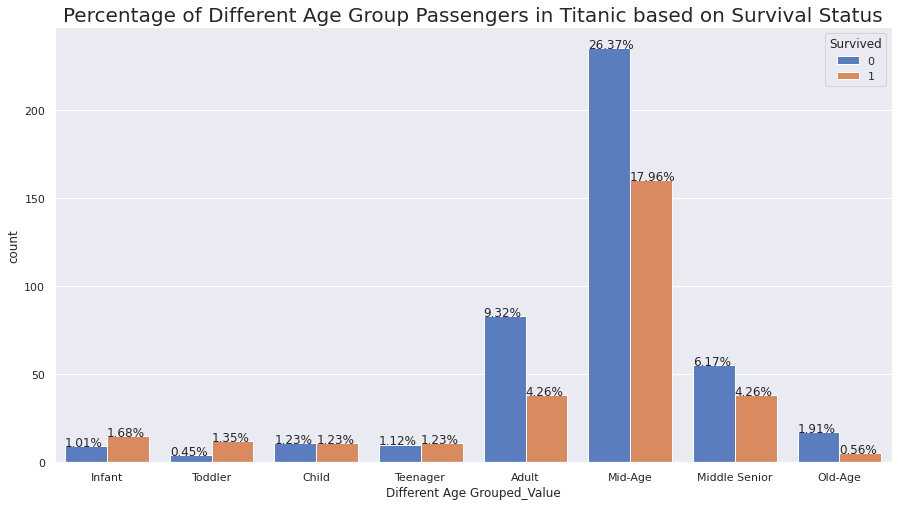

In [276]:
Feature_Bin('Age', numeric_df, 'Percentage of Different Age Group Passengers in Titanic based on Survival Status', 'Survived')

### SibSp

In [204]:
numeric_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

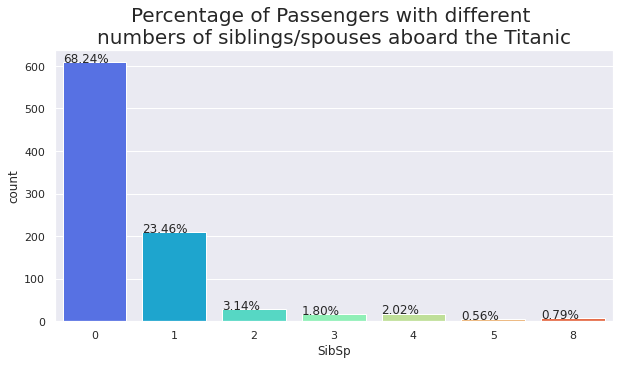

In [205]:
bar_plot('SibSp', numeric_df, 'rainbow', 
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic")

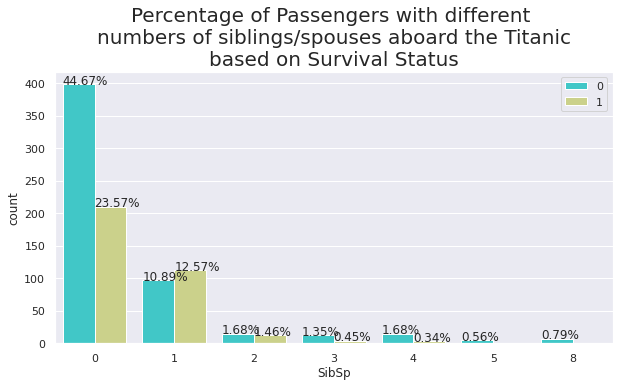

In [206]:
bar_plot('SibSp', numeric_df, 'rainbow', 
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on Survival Status",
         'Survived')

plt.legend(loc='upper right');

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'